## 6.6. Lineer Regresyon ile Tahmin - Odev

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action='ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [3]:
ev = pd.read_csv('house_prices_train.csv')
Y = ev['SalePrice']
X = ev[['OverallQual','GrLivArea','GarageArea','GarageCars','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
       'FullBath','TotRmsAbvGrd']]

In [4]:
# Verilerinizi eğitim ve test kümelerine ayırın.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 465)

print('Egitim kumesindeki gozlem sayisi: {}'.format(X_train.shape[0]))
print('Test kumesindeki gozlem sayisi: {}'.format(X_test.shape[0]))

Egitim kumesindeki gozlem sayisi: 1168
Test kumesindeki gozlem sayisi: 292


In [5]:
# Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

X_train = sm.add_constant(X_train)
results_train = sm.OLS(Y_train,X_train).fit()
results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     390.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:01:57   Log-Likelihood:                -13950.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1157   BIC:                         2.798e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.105e+06   1.44e+05     -7.671      0.000   -1.39e+06   -8.22e+05
OverallQual   1.984e+04   1340.584     14.797      0.000    1.72e+04    2.25e+04
GrLivArea       45.0594      4.706      9.575      0.000      35.826      54.293
GarageArea      17.1388     11.590      1.479      0.139      -5.601      39.878
GarageCars    1.189e+04   3450.974      3.445      0.001    5118.729    1.87e+04
YearBuilt      275.8121     55.419      4.977      0.000     167.079     384.545
YearRemodAdd   246.0751     70.866      3.472      0.001     107.035     385.115
TotalBsmtSF     13.7012      4.649      2.947      0.003       4.580      22.822
1stFlrSF        14.2736      5.357      2.665      0.008       3.764      24.783
FullBath     -4869.7054   2968.844     -1.640      0.101   -1.07e+04     955.215
TotRmsAbvGrd  1643.7793   1250.209      1.315      0.189    -809.151    4096.710
==============================================================================
Omnibus:                      395.722   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39733.113
Skew:                          -0.537   Prob(JB):                         0.00
Kurtosis:                      31.553   Cond. No.                     4.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

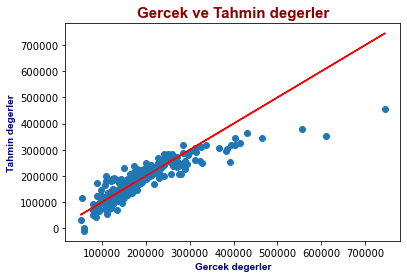

Ortalama mutlak hata (MAE)        : 26093.135377628972
Ortalama kare hata (MSE)          : 1649869554.016166
Kok ortalama kare hata (RMSE)     : 40618.58631237879
Ortalama mutlak yuzde hata (MAPE) : 15.166068176962803


In [8]:
# Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin 
# performansını değerlendirin. Modelinizin performansı tatmin edici mi? Açıklayın.

X_test = sm.add_constant(X_test)

Y_pred = results_train.predict(X_test)

plt.scatter(Y_test,Y_pred)
plt.plot(Y_test,Y_test,color='red')
plt.xlabel('Gercek degerler', fontdict = eksen_font)
plt.ylabel('Tahmin degerler', fontdict = eksen_font)
plt.title('Gercek ve Tahmin degerler', fontdict = baslik_font)
plt.show()

print('Ortalama mutlak hata (MAE)        : {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Ortalama kare hata (MSE)          : {}'.format(mse(Y_test, Y_pred)))
print('Kok ortalama kare hata (RMSE)     : {}'.format(rmse(Y_test, Y_pred)))
print('Ortalama mutlak yuzde hata (MAPE) : {}'.format(np.mean(np.abs((Y_test - Y_pred)/Y_test))*100))

In [ ]:
# Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [29]:
Y = ev['SalePrice']
ev['qual_yearremod'] = ev.OverallQual * ev.YearRemodAdd 
X = ev[['OverallQual','GrLivArea','GarageCars','YearBuilt','YearRemodAdd','TotalBsmtSF','qual_yearremod']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 465)

print('Egitim kumesindeki gozlem sayisi: {}'.format(X_train.shape[0]))
print('Test kumesindeki gozlem sayisi: {}'.format(X_test.shape[0]))

Egitim kumesindeki gozlem sayisi: 1168
Test kumesindeki gozlem sayisi: 292


In [30]:
X_train = sm.add_constant(X_train)
results_train = sm.OLS(Y_train,X_train).fit()
results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     586.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:27:55   Log-Likelihood:                -13930.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1160   BIC:                         2.792e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.763e+06   5.18e+05      5.334      0.000    1.75e+06    3.78e+06
OverallQual    -6.475e+05   8.87e+04     -7.301      0.000   -8.21e+05   -4.73e+05
GrLivArea         49.0809      2.750     17.845      0.000      43.685      54.477
GarageCars      1.495e+04   1983.302      7.540      0.000    1.11e+04    1.88e+04
YearBuilt        169.7099     52.162      3.254      0.001      67.368     272.052
YearRemodAdd   -1592.3977    252.619     -6.304      0.000   -2088.038   -1096.757
TotalBsmtSF       22.2806      3.023      7.371      0.000      16.350      28.211
qual_yearremod   335.6296     44.644      7.518      0.000     248.037     423.222
==============================================================================
Omnibus:                      495.944   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51136.701
Skew:                          -0.976   Prob(JB):                         0.00
Kurtosis:                      35.357   Cond. No.                     6.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

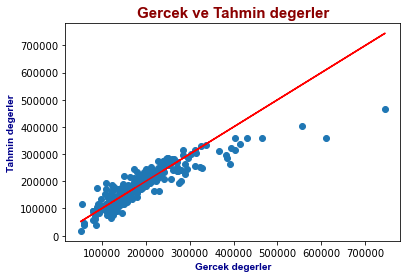

Ortalama mutlak hata (MAE)        : 25162.36596360006
Ortalama kare hata (MSE)          : 1523530383.559676
Kok ortalama kare hata (RMSE)     : 39032.42733368854
Ortalama mutlak yuzde hata (MAPE) : 14.093724483136269


In [31]:
X_test = sm.add_constant(X_test)

Y_pred = results_train.predict(X_test)

plt.scatter(Y_test,Y_pred)
plt.plot(Y_test,Y_test,color='red')
plt.xlabel('Gercek degerler', fontdict = eksen_font)
plt.ylabel('Tahmin degerler', fontdict = eksen_font)
plt.title('Gercek ve Tahmin degerler', fontdict = baslik_font)
plt.show()

print('Ortalama mutlak hata (MAE)        : {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Ortalama kare hata (MSE)          : {}'.format(mse(Y_test, Y_pred)))
print('Kok ortalama kare hata (RMSE)     : {}'.format(rmse(Y_test, Y_pred)))
print('Ortalama mutlak yuzde hata (MAPE) : {}'.format(np.mean(np.abs((Y_test - Y_pred)/Y_test))*100))

<img src="1. model vs 2. model.png">

In [32]:
# iki modeli karsilastirdigimizda her ne kadar ikinci model de cok cok fazla bir ilerleme kat edememis de olsam,
# birinci modele gore kucuk bir oradan daha fazla aciklayici gozukuyor.